In [1]:
import pandas as pd
from torch.utils.data import DataLoader
import pytorch_lightning as pl
#from pytorch_lightning.profiler import Profiler, AdvancedProfiler
import HeatfluxData as hfd
import HeatfluxModel as hfm

/usr/workspace/mlmfem/anaconda3/envs/ptl_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
filename_data = f'scaled_QdataKn25width100microns.csv'
# Using heat flux data module
scaled_Qdata = pd.read_csv(filename_data, header=0, index_col=0)
test_set, train_set, validation_set, vis_set = hfd.heat_flux_datasets(scaled_Qdata, 0.3, 0.8)

In [3]:
### Create data loaders
train_loader = DataLoader(dataset = train_set, batch_size = 128)
validation_loader = DataLoader(dataset = validation_set, batch_size = 128)
test_loader = DataLoader(dataset = test_set, batch_size = 128)
# Special object for visualization
vis_loader = DataLoader(dataset = vis_set, batch_size = 128)

In [4]:
### Read data sacling (generated by the data manager)
data_scaling=pd.read_csv(f'data_scaling.csv', header=0, index_col=0)

In [5]:
### Create the heat flux model
Nfeatures = train_set[0][0].size()[0]# TODO: find a better way than extracting the size via Tensor
print(f'Nfeatures {Nfeatures}')
Nlayer1 = 20
Nlayer2 = 10
model = hfm.DirectModel(Nfeatures, Nlayer1, Nlayer2, data_scaling)

Nfeatures 125


In [6]:
### Let's train the beast!
trainer = pl.Trainer(max_epochs = 50)
trainer.fit(model, train_loader, validation_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name     | Type    | Params
-------------------------------------
0 | fc1      | Linear  | 2.5 K 
1 | fc2      | Linear  | 210   
2 | fc3      | Linear  | 11    
3 | mse_loss | MSELoss | 0     
-------------------------------------
2.7 K     Trainable params
0         Non-trainable params
2.7 K     Total params
0.011     Total estimated model params size (MB)


/usr/workspace/mlmfem/anaconda3/envs/ptl_env/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 64 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/usr/workspace/mlmfem/anaconda3/envs/ptl_env/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 64 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 0:  80%|███████████████████▏    | 166/208 [00:01<00:00, 164.85it/s, loss=0.0494, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 1:  80%|███████████████████▏    | 166/208 [00:00<00:00, 168.81it/s, loss=0.0272, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 1:  96%|██████████████████████▉ | 199/208 [00:01<00:00, 176.51it/s, loss=0.0272, v_num=43]


Epoch 2:  80%|███████████████████▏    | 166/208 [00:00<00:00, 171.20it/s, loss=0.0157, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 3:  80%|██████████████████▎    | 166/208 [00:00<00:00, 171.40it/s, loss=0.00992, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 3:  91%|█████████████████████  | 190/208 [00:01<00:00, 176.68it/s, loss=0.00992, v_num=43]


Epoch 4:  80%|██████████████████▎    | 166/208 [00:00<00:00, 170.24it/s, loss=0.00642, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 5:  80%|██████████████████▎    | 166/208 [00:00<00:00, 171.77it/s, loss=0.00491, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 5:  87%|████████████████████   | 181/208 [00:01<00:00, 175.53it/s, loss=0.00491, v_num=43]


Epoch 6:  80%|██████████████████▎    | 166/208 [00:00<00:00, 173.18it/s, loss=0.00426, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 7:  80%|███████████████████▉     | 166/208 [00:00<00:00, 172.92it/s, loss=0.003, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 7:  83%|████████████████████▋    | 172/208 [00:00<00:00, 173.75it/s, loss=0.003, v_num=43]


Epoch 8:  80%|██████████████████▎    | 166/208 [00:00<00:00, 170.65it/s, loss=0.00201, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 8: 100%|███████████████████████| 208/208 [00:01<00:00, 179.62it/s, loss=0.00201, v_num=43]


Epoch 9:  80%|██████████████████▎    | 166/208 [00:00<00:00, 170.70it/s, loss=0.00143, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 10:  80%|█████████████████▌    | 166/208 [00:00<00:00, 174.05it/s, loss=0.00106, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 10:  96%|█████████████████████ | 199/208 [00:01<00:00, 182.78it/s, loss=0.00106, v_num=43]


Epoch 11:  80%|████████████████▊    | 166/208 [00:00<00:00, 175.17it/s, loss=0.000797, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 12:  80%|████████████████▊    | 166/208 [00:00<00:00, 175.97it/s, loss=0.000617, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 12:  91%|███████████████████▏ | 190/208 [00:01<00:00, 182.16it/s, loss=0.000617, v_num=43]


Epoch 13:  80%|████████████████▊    | 166/208 [00:00<00:00, 178.08it/s, loss=0.000502, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 14:  80%|████████████████▊    | 166/208 [00:00<00:00, 175.38it/s, loss=0.000416, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 14:  87%|██████████████████▎  | 181/208 [00:01<00:00, 179.50it/s, loss=0.000416, v_num=43]


Epoch 15:  80%|████████████████▊    | 166/208 [00:00<00:00, 169.62it/s, loss=0.000356, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 16:  80%|████████████████▊    | 166/208 [00:00<00:00, 174.87it/s, loss=0.000316, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 16:  83%|█████████████████▎   | 172/208 [00:00<00:00, 175.64it/s, loss=0.000316, v_num=43]


Epoch 17:  80%|█████████████████▌    | 166/208 [00:00<00:00, 174.23it/s, loss=0.00029, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 17: 100%|██████████████████████| 208/208 [00:01<00:00, 185.85it/s, loss=0.00029, v_num=43]


Epoch 18:  80%|████████████████▊    | 166/208 [00:00<00:00, 175.59it/s, loss=0.000267, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 19:  80%|█████████████████▌    | 166/208 [00:00<00:00, 177.55it/s, loss=0.00025, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 19:  96%|█████████████████████ | 199/208 [00:01<00:00, 186.24it/s, loss=0.00025, v_num=43]


Epoch 20:  80%|████████████████▊    | 166/208 [00:00<00:00, 176.74it/s, loss=0.000235, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 21:  80%|████████████████▊    | 166/208 [00:00<00:00, 174.70it/s, loss=0.000223, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 21:  91%|███████████████████▏ | 190/208 [00:01<00:00, 181.30it/s, loss=0.000223, v_num=43]


Epoch 22:  80%|█████████████████▌    | 166/208 [00:00<00:00, 182.28it/s, loss=0.00021, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 23:  80%|██████████████████▎    | 166/208 [00:00<00:00, 172.92it/s, loss=0.0002, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 23:  87%|████████████████████   | 181/208 [00:01<00:00, 175.91it/s, loss=0.0002, v_num=43]


Epoch 24:  80%|█████████████████▌    | 166/208 [00:00<00:00, 172.33it/s, loss=0.00019, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 25:  80%|████████████████▊    | 166/208 [00:00<00:00, 174.52it/s, loss=0.000183, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 25:  83%|█████████████████▎   | 172/208 [00:00<00:00, 175.52it/s, loss=0.000183, v_num=43]


Epoch 26:  80%|████████████████▊    | 166/208 [00:00<00:00, 180.85it/s, loss=0.000177, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 26: 100%|█████████████████████| 208/208 [00:01<00:00, 191.26it/s, loss=0.000177, v_num=43]


Epoch 27:  80%|█████████████████▌    | 166/208 [00:00<00:00, 180.83it/s, loss=0.00017, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 28:  80%|████████████████▊    | 166/208 [00:00<00:00, 171.17it/s, loss=0.000165, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 28:  96%|████████████████████ | 199/208 [00:01<00:00, 178.74it/s, loss=0.000165, v_num=43]


Epoch 29:  80%|█████████████████▌    | 166/208 [00:00<00:00, 171.16it/s, loss=0.00016, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 30:  80%|████████████████▊    | 166/208 [00:00<00:00, 174.93it/s, loss=0.000155, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 30:  91%|███████████████████▏ | 190/208 [00:01<00:00, 180.46it/s, loss=0.000155, v_num=43]


Epoch 31:  80%|█████████████████▌    | 166/208 [00:00<00:00, 181.41it/s, loss=0.00015, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 32:  80%|████████████████▊    | 166/208 [00:00<00:00, 182.23it/s, loss=0.000145, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 32:  87%|██████████████████▎  | 181/208 [00:00<00:00, 186.49it/s, loss=0.000145, v_num=43]


Epoch 33:  80%|████████████████▊    | 166/208 [00:00<00:00, 180.45it/s, loss=0.000141, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 34:  80%|████████████████▊    | 166/208 [00:00<00:00, 181.14it/s, loss=0.000138, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 34:  83%|█████████████████▎   | 172/208 [00:00<00:00, 181.69it/s, loss=0.000138, v_num=43]


Epoch 35:  80%|████████████████▊    | 166/208 [00:00<00:00, 179.49it/s, loss=0.000135, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 35: 100%|█████████████████████| 208/208 [00:01<00:00, 193.42it/s, loss=0.000135, v_num=43]


Epoch 36:  80%|████████████████▊    | 166/208 [00:00<00:00, 182.17it/s, loss=0.000133, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 37:  80%|█████████████████▌    | 166/208 [00:00<00:00, 177.84it/s, loss=0.00013, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 37:  96%|█████████████████████ | 199/208 [00:01<00:00, 187.01it/s, loss=0.00013, v_num=43]


Epoch 38:  80%|████████████████▊    | 166/208 [00:01<00:00, 165.88it/s, loss=0.000128, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 39:  80%|████████████████▊    | 166/208 [00:00<00:00, 169.08it/s, loss=0.000125, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 39:  91%|███████████████████▏ | 190/208 [00:01<00:00, 174.62it/s, loss=0.000125, v_num=43]


Epoch 40:  80%|████████████████▊    | 166/208 [00:00<00:00, 170.18it/s, loss=0.000123, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 41:  80%|████████████████▊    | 166/208 [00:00<00:00, 182.63it/s, loss=0.000122, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 41:  87%|██████████████████▎  | 181/208 [00:00<00:00, 186.36it/s, loss=0.000122, v_num=43]


Epoch 42:  80%|█████████████████▌    | 166/208 [00:00<00:00, 181.79it/s, loss=0.00012, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 43:  80%|████████████████▊    | 166/208 [00:00<00:00, 169.90it/s, loss=0.000119, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 43:  83%|█████████████████▎   | 172/208 [00:01<00:00, 170.65it/s, loss=0.000119, v_num=43]


Epoch 44:  80%|████████████████▊    | 166/208 [00:00<00:00, 178.35it/s, loss=0.000117, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 44: 100%|█████████████████████| 208/208 [00:01<00:00, 190.80it/s, loss=0.000117, v_num=43]


Epoch 45:  80%|████████████████▊    | 166/208 [00:00<00:00, 176.55it/s, loss=0.000114, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 46:  80%|████████████████▊    | 166/208 [00:00<00:00, 170.58it/s, loss=0.000113, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 46:  96%|████████████████████ | 199/208 [00:01<00:00, 178.96it/s, loss=0.000113, v_num=43]


Epoch 47:  80%|████████████████▊    | 166/208 [00:00<00:00, 170.02it/s, loss=0.000111, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 48:  80%|█████████████████▌    | 166/208 [00:01<00:00, 164.33it/s, loss=0.00011, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 48:  91%|████████████████████  | 190/208 [00:01<00:00, 168.89it/s, loss=0.00011, v_num=43]


Epoch 49:  80%|████████████████▊    | 166/208 [00:00<00:00, 181.69it/s, loss=0.000108, v_num=43]
Validation: 0it [00:00, ?it/s]
Epoch 49: 100%|█████████████████████| 208/208 [00:01<00:00, 193.16it/s, loss=0.000108, v_num=43]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|█████████████████████| 208/208 [00:01<00:00, 192.62it/s, loss=0.000108, v_num=43]


In [7]:
### Test the beast
# Get model prediction of heat flux values from visualization data set vis_set
values_prediction = model.heatflux_model(vis_set[:][0])
# Get actual heat flux values from data using bask scaling
mean = data_scaling['Qimpact']['mean']
std = data_scaling['Qimpact']['std']
values_actual = vis_set[:][1] * std + mean
# Convert to numpy ndarray
values_prediction = values_prediction.detach().numpy()
values_actual = values_actual.detach().numpy()

In [8]:
# Add local flux evaluation
model = hfm.AlphacModel(Nfeatures, Nlayer1, Nlayer2, data_scaling)
values_local = model.heatflux_model(vis_set[:][0])
values_local = values_local.detach().numpy()

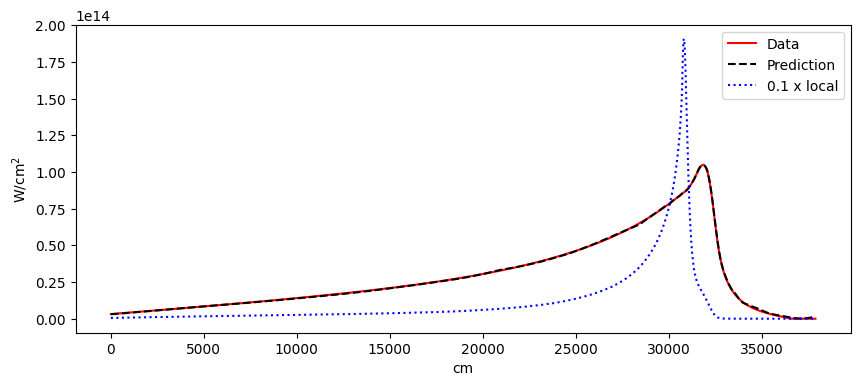

In [9]:
from matplotlib import pyplot as plt
# And finally we can see that our network has done a decent job of estimating!
fig1, ax1 = plt.subplots(figsize=(10,4))
ax1.plot(values_actual, 'r', label='Data')
ax1.plot(values_prediction, 'k--', label='Prediction')
ax1.plot(0.1 * values_local, 'b:', label='0.1 x local')
ax1.set_xlabel('cm')
ax1.set_ylabel('W/cm$^2$')
ax1.legend()